# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "api.openweathermap.org/data/2.5/weather?APPID={}".format(weather_api_key)


for city in cities[0:5]:
    print(url+"&q={}".format(city),"\n")

api.openweathermap.org/data/2.5/weather?APPID=f2c1ab865ada3ee68e1c1c2331bb0740&q=ushuaia 

api.openweathermap.org/data/2.5/weather?APPID=f2c1ab865ada3ee68e1c1c2331bb0740&q=thompson 

api.openweathermap.org/data/2.5/weather?APPID=f2c1ab865ada3ee68e1c1c2331bb0740&q=bredasdorp 

api.openweathermap.org/data/2.5/weather?APPID=f2c1ab865ada3ee68e1c1c2331bb0740&q=puerto escondido 

api.openweathermap.org/data/2.5/weather?APPID=f2c1ab865ada3ee68e1c1c2331bb0740&q=belushya guba 



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.read_csv(output_data_file)
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

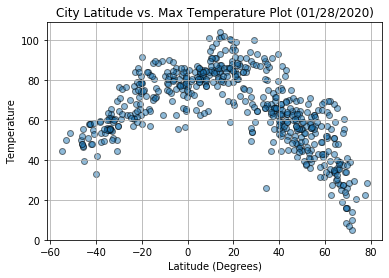

In [7]:
# Creating scatter plot for lat v. temp
# Making variables for easier coding
latitude= weather_df["Lat"]
temperature= weather_df["Max Temp"]

#print(latitude)
#print(temperature)
lat_temp_plot = plt.scatter(latitude, temperature, edgecolors= "black", alpha = .5)
plt.title("City Latitude vs. Max Temperature Plot (01/28/2020)")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature")
plt.grid()

plt.savefig("../output_data/latitude_vs._temp.png")
plt.show()

#### Latitude vs. Temperature Plot

In [ ]:
#The graph above analyzes latitudinal positioning's effect on Maximum temperatures

#### Latitude vs. Humidity Plot

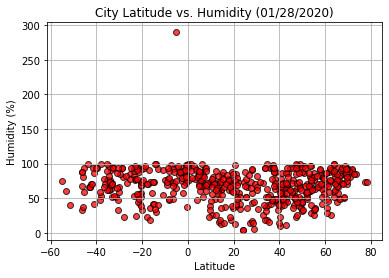

In [8]:
#creating scatterplot for latitude and humidity
humidity = weather_df["Humidity"]

lat_humid_df = plt.scatter(latitude, humidity, facecolors = "red", edgecolors= "black", alpha = .75)
plt.title("City Latitude vs. Humidity (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../output_data/lat_vs._humid.png")
plt.show()

In [ ]:
#The graph above analyzes latitudinal positioning's effect on humidity

#### Latitude vs. Cloudiness Plot

In [ ]:
weather_df

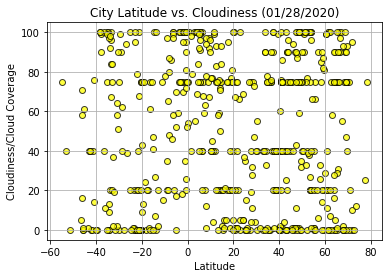

In [9]:
# Creating scatter for latitude vs. cloudiness
cloudiness = weather_df["Cloudiness"]

plt.scatter(latitude, cloudiness, facecolor = "yellow", edgecolor="black", alpha = .75)
plt.title("City Latitude vs. Cloudiness (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness/Cloud Coverage")
plt.grid()

plt.savefig("../output_data/latitude_cloudiness.png")
plt.show()

In [ ]:
#The graph above analyzes latitudinal positioning's effect on cloud coverage

#### Latitude vs. Wind Speed Plot

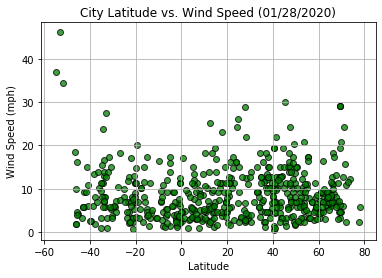

In [10]:
# creating scatterplot for latitude and wind speed
wind_speed = weather_df["Wind Speed"]

plt.scatter(latitude, wind_speed, facecolor= "green", edgecolor= "black", alpha=.75)
plt.title("City Latitude vs. Wind Speed (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../output_data/latitude_wind.png")
plt.show()

In [ ]:
# The graph above analyzes latitudinal positioning's effects on wind speeds. 

## Linear Regression

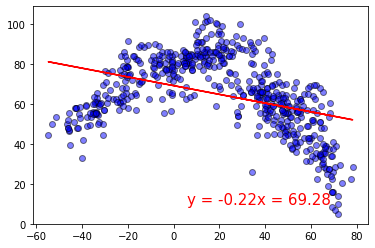

The r-squared is: -0.39360633693822006


In [56]:
# OPTIONAL: Create a function to create Linear Regression plots
#plotting regression framing using max temp and latitude 
tempx_values = latitude
tempy_values = temperature
degree = 2


#creating regression line using max temp and latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(tempx_values, tempy_values)
tempregress_values = tempx_values*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(tempx_values, tempy_values, facecolor = "blue", edgecolor="black", alpha=.5)
plt.plot(tempx_values, tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

In [100]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[(
weather_df["Lat"] > 0)]
northern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [101]:
southern_df = weather_df.loc[(
weather_df["Lat"] < 0)]
southern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
...,...,...,...,...,...,...,...,...,...,...
526,526,viedma,14,AR,1558378894,41,-40.81,-62.99,58.56,10.98
531,531,russell,75,AR,1558378895,71,-33.01,-68.80,50.00,12.75
536,536,padang,100,ID,1558378896,82,-0.92,100.36,81.24,7.65
539,539,palu,72,ID,1558378897,80,-0.90,119.87,78.72,3.83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

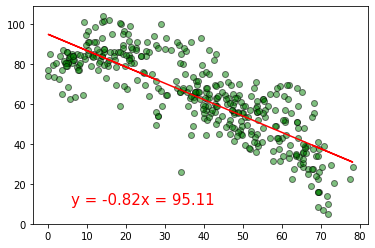

The r-squared is: -0.8151657406810829


In [104]:
#creating new variables for northern_df
north_lat = northern_df["Lat"]
north_temp = northern_df["Max Temp"]

#creating regression line using northern_df variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
north_tempregress_values = north_lat*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(north_lat, north_temp, facecolor = "green", edgecolor="black", alpha=.5)
plt.plot(north_lat, north_tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

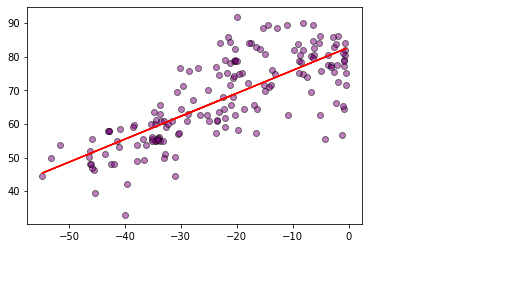

The r-squared is: 0.7602633550516462


In [105]:
south_lat = southern_df["Lat"]
south_temp = southern_df["Max Temp"]

#creating regression line using northern_df variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
south_tempregress_values = south_lat*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(south_lat, south_temp, facecolor = "purple", edgecolor="black", alpha=.5)
plt.plot(south_lat, south_tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

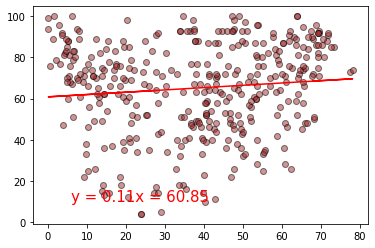

The r-squared is: 0.10358336015746496


In [107]:
north_humid = northern_df["Humidity"]


#creating regression line using northern_df variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
north_tempregress_values = north_lat*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(north_lat, north_humid, facecolor = "brown", edgecolor="black", alpha=.5)
plt.plot(north_lat, north_tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

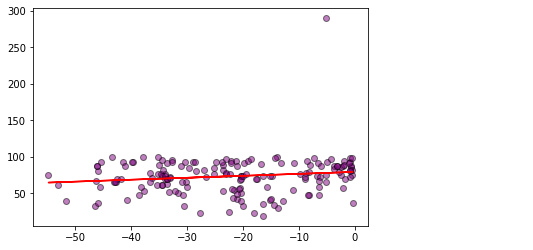

The r-squared is: 0.14689473425583074


In [109]:
south_humid = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
south_tempregress_values = south_lat*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(south_lat, south_humid, facecolor = "purple", edgecolor="black", alpha=.5)
plt.plot(south_lat, south_tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
north_cloudy = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudy)
north_tempregress_values = north_lat*slope + intercept
templine_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept, 2))
plt.scatter(north_lat, north_cloudy, facecolor = "brown", edgecolor="black", alpha=.5)
plt.plot(north_lat, north_tempregress_values, "r-")
plt.annotate(templine_eq,(6,10), fontsize=15, color = "red")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression